In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/batang.ttc"  # 나눔고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
# 선진국 통화 6개 (USD 기준)
advanced_currencies = ['CNYUSD=X', 'EURUSD=X', 'JPYUSD=X', 'GBPUSD=X', 'CADUSD=X', 'CHFUSD=X', 'SEKUSD=X']

# 데이터 다운로드 ('max'로 최대 기간 데이터 다운로드)
data_advanced = yf.download(advanced_currencies, period='max', interval='1d')['Adj Close']

# 데이터 구간 선택 함수 (1년, 3년, 10년, max 기간 데이터 선택)
def select_data(data, years):
    end_date = data.index.max()  # 가장 최신 날짜
    if years != 'max':
        start_date = end_date - pd.DateOffset(years=years)
        return data.loc[start_date:end_date]
    else:
        return data

# 1년, 3년, 10년, max 기간별 데이터 선택
data_1y_adv = select_data(data_advanced, 1)
data_3y_adv = select_data(data_advanced, 3)
data_10y_adv = select_data(data_advanced, 10)
data_max_adv = select_data(data_advanced, 'max')

[*********************100%***********************]  7 of 7 completed


In [3]:
# 각 통화 대비 위안화 환율을 계산
# 위안화 환율을 다른 통화의 USD 환율과 나누어 계산합니다.
cny_adv_1y = data_1y_adv.div(data_1y_adv['CNYUSD=X'], axis=0).drop(columns=['CNYUSD=X'])
cny_adv_3y = data_3y_adv.div(data_3y_adv['CNYUSD=X'], axis=0).drop(columns=['CNYUSD=X'])
cny_adv_10y = data_10y_adv.div(data_10y_adv['CNYUSD=X'], axis=0).drop(columns=['CNYUSD=X'])
cny_adv_max = data_max_adv.div(data_max_adv['CNYUSD=X'], axis=0).drop(columns=['CNYUSD=X'])

# 각 기간별 변동성(표준편차) 계산
volatility_1y_adv = cny_adv_1y.pct_change().std() * 100  # 변동성을 백분율로 변환
volatility_3y_adv = cny_adv_3y.pct_change().std() * 100
volatility_10y_adv = cny_adv_10y.pct_change().std() * 100
volatility_max_adv = cny_adv_max.pct_change().std() * 100

# 각 기간별 상관계수 계산 (CNY 본인 제외)
cny_correlation_1y_adv = data_1y_adv.corr()['CNYUSD=X'].drop('CNYUSD=X')
cny_correlation_3y_adv = data_3y_adv.corr()['CNYUSD=X'].drop('CNYUSD=X')
cny_correlation_10y_adv = data_10y_adv.corr()['CNYUSD=X'].drop('CNYUSD=X')
cny_correlation_max_adv = data_max_adv.corr()['CNYUSD=X'].drop('CNYUSD=X')

# 결과 출력 (변동성)
print("1년치 선진국 통화 변동성 (%):")
print(volatility_1y_adv)

print("\n3년치 선진국 통화 변동성 (%):")
print(volatility_3y_adv)

print("\n10년치 선진국 통화 변동성 (%):")
print(volatility_10y_adv)

print("\nMax 기간 선진국 통화 변동성 (%):")
print(volatility_max_adv)

# 결과 출력 (상관계수)
print("\n1년치 위안화와 선진국 통화 간 상관계수:")
print(cny_correlation_1y_adv)

print("\n3년치 위안화와 선진국 통화 간 상관계수:")
print(cny_correlation_3y_adv)

print("\n10년치 위안화와 선진국 통화 간 상관계수:")
print(cny_correlation_10y_adv)

print("\nMax 기간 위안화와 선진국 통화 간 상관계수:")
print(cny_correlation_max_adv)

1년치 선진국 통화 변동성 (%):
Ticker
CADUSD=X    0.513413
CHFUSD=X    0.601898
EURUSD=X    0.550950
GBPUSD=X    0.579615
JPYUSD=X    0.713826
SEKUSD=X    0.737912
dtype: float64

3년치 선진국 통화 변동성 (%):
Ticker
CADUSD=X    0.509255
CHFUSD=X    0.557125
EURUSD=X    0.543233
GBPUSD=X    0.608782
JPYUSD=X    0.684301
SEKUSD=X    0.743542
dtype: float64

10년치 선진국 통화 변동성 (%):
Ticker
CADUSD=X    0.500734
CHFUSD=X    0.637832
EURUSD=X    0.518498
GBPUSD=X    0.593025
JPYUSD=X    0.595397
SEKUSD=X    0.643976
dtype: float64

Max 기간 선진국 통화 변동성 (%):
Ticker
CADUSD=X    0.594143
CHFUSD=X    0.708527
EURUSD=X    0.739709
GBPUSD=X    0.626834
JPYUSD=X    0.759529
SEKUSD=X    0.760512
dtype: float64

1년치 위안화와 선진국 통화 간 상관계수:
Ticker
CADUSD=X    0.642171
CHFUSD=X    0.808681
EURUSD=X    0.713039
GBPUSD=X    0.572198
JPYUSD=X    0.738932
SEKUSD=X    0.726878
Name: CNYUSD=X, dtype: float64

3년치 위안화와 선진국 통화 간 상관계수:
Ticker
CADUSD=X    0.885186
CHFUSD=X   -0.372241
EURUSD=X    0.416171
GBPUSD=X    0.492192
JPYUSD=X    0.94

C:\Users\PhamPham\AppData\Local\Temp\ipykernel_20548\358765454.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_1y_adv = cny_adv_1y.pct_change().std() * 100  # 변동성을 백분율로 변환
C:\Users\PhamPham\AppData\Local\Temp\ipykernel_20548\358765454.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_3y_adv = cny_adv_3y.pct_change().std() * 100
C:\Users\PhamPham\AppData\Local\Temp\ipykernel_20548\358765454.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values pr

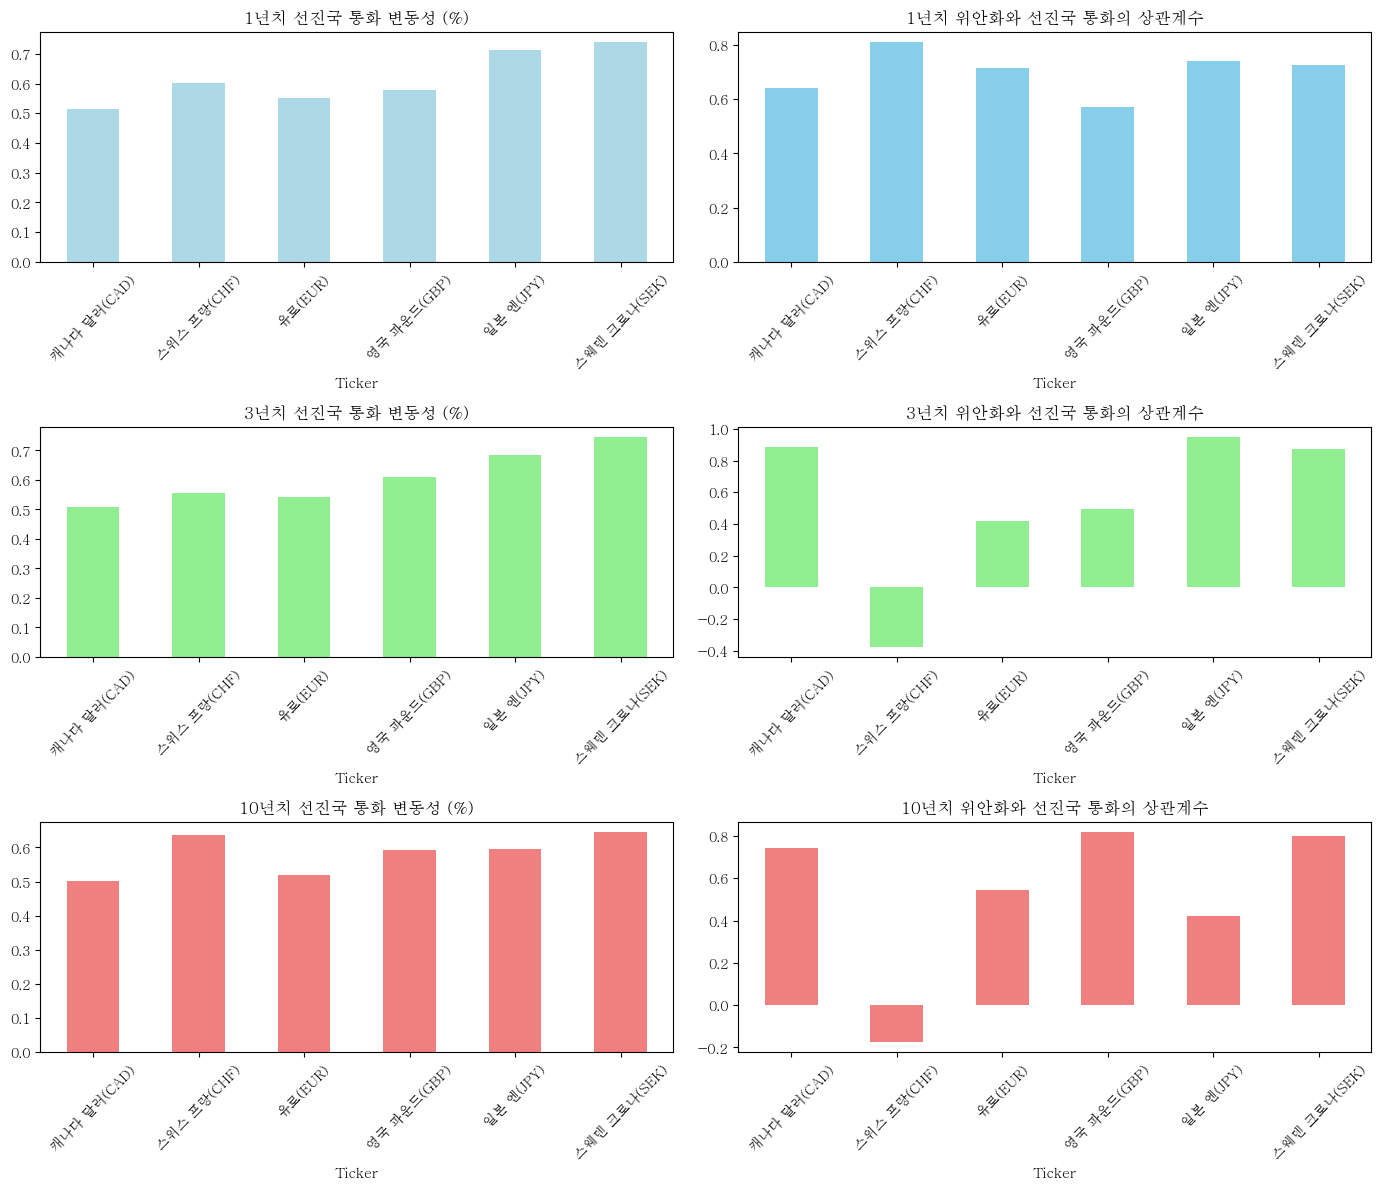

In [4]:
# 시각화 (변동성과 상관계수 비교)
currency_names = ['캐나다 달러(CAD)', '스위스 프랑(CHF)', '유로(EUR)', '영국 파운드(GBP)', '일본 엔(JPY)', '스웨덴 크로나(SEK)']  # 이름을 변경할 수 있습니다.
plt.figure(figsize=(14, 12))

# 1년치 변동성 그래프
plt.subplot(3, 2, 1)
volatility_1y_adv.plot(kind='bar', color='lightblue')
plt.title('1년치 선진국 통화 변동성 (%)')
plt.xticks(ticks=range(len(currency_names)), labels=currency_names, rotation=45)  # x축 레이블 설정

# 3년치 변동성 그래프
plt.subplot(3, 2, 3)
volatility_3y_adv.plot(kind='bar', color='lightgreen')
plt.title('3년치 선진국 통화 변동성 (%)')
plt.xticks(ticks=range(len(currency_names)), labels=currency_names, rotation=45)  # x축 레이블 설정

# 10년치 변동성 그래프
plt.subplot(3, 2, 5)
volatility_10y_adv.plot(kind='bar', color='lightcoral')
plt.title('10년치 선진국 통화 변동성 (%)')
plt.xticks(ticks=range(len(currency_names)), labels=currency_names, rotation=45)  # x축 레이블 설정

# 1년치 상관계수 그래프
plt.subplot(3, 2, 2)
cny_correlation_1y_adv.plot(kind='bar', color='skyblue')
plt.title('1년치 위안화와 선진국 통화의 상관계수')
plt.xticks(ticks=range(len(currency_names)), labels=currency_names, rotation=45)  # x축 레이블 설정

# 3년치 상관계수 그래프
plt.subplot(3, 2, 4)
cny_correlation_3y_adv.plot(kind='bar', color='lightgreen')
plt.title('3년치 위안화와 선진국 통화의 상관계수')
plt.xticks(ticks=range(len(currency_names)), labels=currency_names, rotation=45)  # x축 레이블 설정

# 10년치 상관계수 그래프
plt.subplot(3, 2, 6)
cny_correlation_10y_adv.plot(kind='bar', color='lightcoral')
plt.title('10년치 위안화와 선진국 통화의 상관계수')
plt.xticks(ticks=range(len(currency_names)), labels=currency_names, rotation=45)  # x축 레이블 설정

plt.tight_layout()
plt.show()

In [5]:
# 신흥국 통화 6개 (USD 기준)
emerging_currencies = ['CNYUSD=X', 'KRWUSD=X', 'INRUSD=X', 'TWDUSD=X', 'THBUSD=X', 'IDRUSD=X', 'PHPUSD=X']

# 데이터 다운로드 ('max'로 최대 기간 데이터 다운로드)
data_emerging = yf.download(emerging_currencies, period='max', interval='1d')['Adj Close']

# 데이터 구간 선택 함수 (1년, 3년, 10년, max 기간 데이터 선택)
def select_data(data, years):
    end_date = data.index.max()  # 가장 최신 날짜
    if years != 'max':
        start_date = end_date - pd.DateOffset(years=years)
        return data.loc[start_date:end_date]
    else:
        return data

# 1년, 3년, 10년, max 기간별 데이터 선택
data_1y_emer = select_data(data_emerging, 1)
data_3y_emer = select_data(data_emerging, 3)
data_10y_emer = select_data(data_emerging, 10)
data_max_emer = select_data(data_emerging, 'max')

[*********************100%***********************]  7 of 7 completed


In [6]:
# 각 통화 대비 위안화 환율을 계산
# 위안화 환율을 다른 통화의 USD 환율과 나누어 계산합니다.
cny_emer_1y = data_1y_emer.div(data_1y_emer['CNYUSD=X'], axis=0).drop(columns=['CNYUSD=X'])
cny_emer_3y = data_3y_emer.div(data_3y_emer['CNYUSD=X'], axis=0).drop(columns=['CNYUSD=X'])
cny_emer_10y = data_10y_emer.div(data_10y_emer['CNYUSD=X'], axis=0).drop(columns=['CNYUSD=X'])
cny_emer_max = data_max_emer.div(data_max_emer['CNYUSD=X'], axis=0).drop(columns=['CNYUSD=X'])

# 각 기간별 변동성(표준편차) 계산
volatility_1y_emer = cny_emer_1y.pct_change().std() * 100  # 변동성을 백분율로 변환
volatility_3y_emer = cny_emer_3y.pct_change().std() * 100
volatility_10y_emer = cny_emer_10y.pct_change().std() * 100
volatility_max_emer = cny_emer_max.pct_change().std() * 100

# 각 기간별 상관계수 계산 (CNY 본인 제외)
cny_correlation_1y_emer = data_1y_emer.corr()['CNYUSD=X'].drop('CNYUSD=X')
cny_correlation_3y_emer = data_3y_emer.corr()['CNYUSD=X'].drop('CNYUSD=X')
cny_correlation_10y_emer = data_10y_emer.corr()['CNYUSD=X'].drop('CNYUSD=X')
cny_correlation_max_emer = data_max_emer.corr()['CNYUSD=X'].drop('CNYUSD=X')

# 결과 출력 (변동성)
print("1년치 신흥국 통화 변동성 (%):")
print(volatility_1y_emer)

print("\n3년치 신흥국 통화 변동성 (%):")
print(volatility_3y_emer)

print("\n10년치 신흥국 통화 변동성 (%):")
print(volatility_10y_emer)

print("\nMax 기간 신흥국 통화 변동성 (%):")
print(volatility_max_emer)

# 결과 출력 (상관계수)
print("\n1년치 위안화와 신흥국 통화 간 상관계수:")
print(cny_correlation_1y_emer)

print("\n3년치 위안화와 신흥국 통화 간 상관계수:")
print(cny_correlation_3y_emer)

print("\n10년치 위안화와 신흥국 통화 간 상관계수:")
print(cny_correlation_10y_emer)

print("\nMax 기간 위안화와 신흥국 통화 간 상관계수:")
print(cny_correlation_max_emer)

1년치 신흥국 통화 변동성 (%):
Ticker
IDRUSD=X    0.652285
INRUSD=X    0.530864
KRWUSD=X    0.662449
PHPUSD=X    0.541114
THBUSD=X    0.637030
TWDUSD=X    0.566080
dtype: float64

3년치 신흥국 통화 변동성 (%):
Ticker
IDRUSD=X    0.528048
INRUSD=X    0.463235
KRWUSD=X    0.617507
PHPUSD=X    0.566415
THBUSD=X    0.554723
TWDUSD=X    0.475147
dtype: float64

10년치 신흥국 통화 변동성 (%):
Ticker
IDRUSD=X     0.641253
INRUSD=X     0.437347
KRWUSD=X     0.546194
PHPUSD=X     0.553478
THBUSD=X     0.487684
TWDUSD=X    14.633482
dtype: float64

Max 기간 신흥국 통화 변동성 (%):
Ticker
IDRUSD=X    16.749254
INRUSD=X     0.539514
KRWUSD=X     0.888694
PHPUSD=X     0.553091
THBUSD=X     0.686079
TWDUSD=X    23.258449
dtype: float64

1년치 위안화와 신흥국 통화 간 상관계수:
Ticker
IDRUSD=X    0.702100
INRUSD=X   -0.057303
KRWUSD=X    0.593352
PHPUSD=X    0.591149
THBUSD=X    0.791027
TWDUSD=X    0.668207
Name: CNYUSD=X, dtype: float64

3년치 위안화와 신흥국 통화 간 상관계수:
Ticker
IDRUSD=X    0.872654
INRUSD=X    0.937008
KRWUSD=X    0.870834
PHPUSD=X    0.897896
THBU

C:\Users\PhamPham\AppData\Local\Temp\ipykernel_20548\631700136.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_10y_emer = cny_emer_10y.pct_change().std() * 100
C:\Users\PhamPham\AppData\Local\Temp\ipykernel_20548\631700136.py:12: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_max_emer = cny_emer_max.pct_change().std() * 100


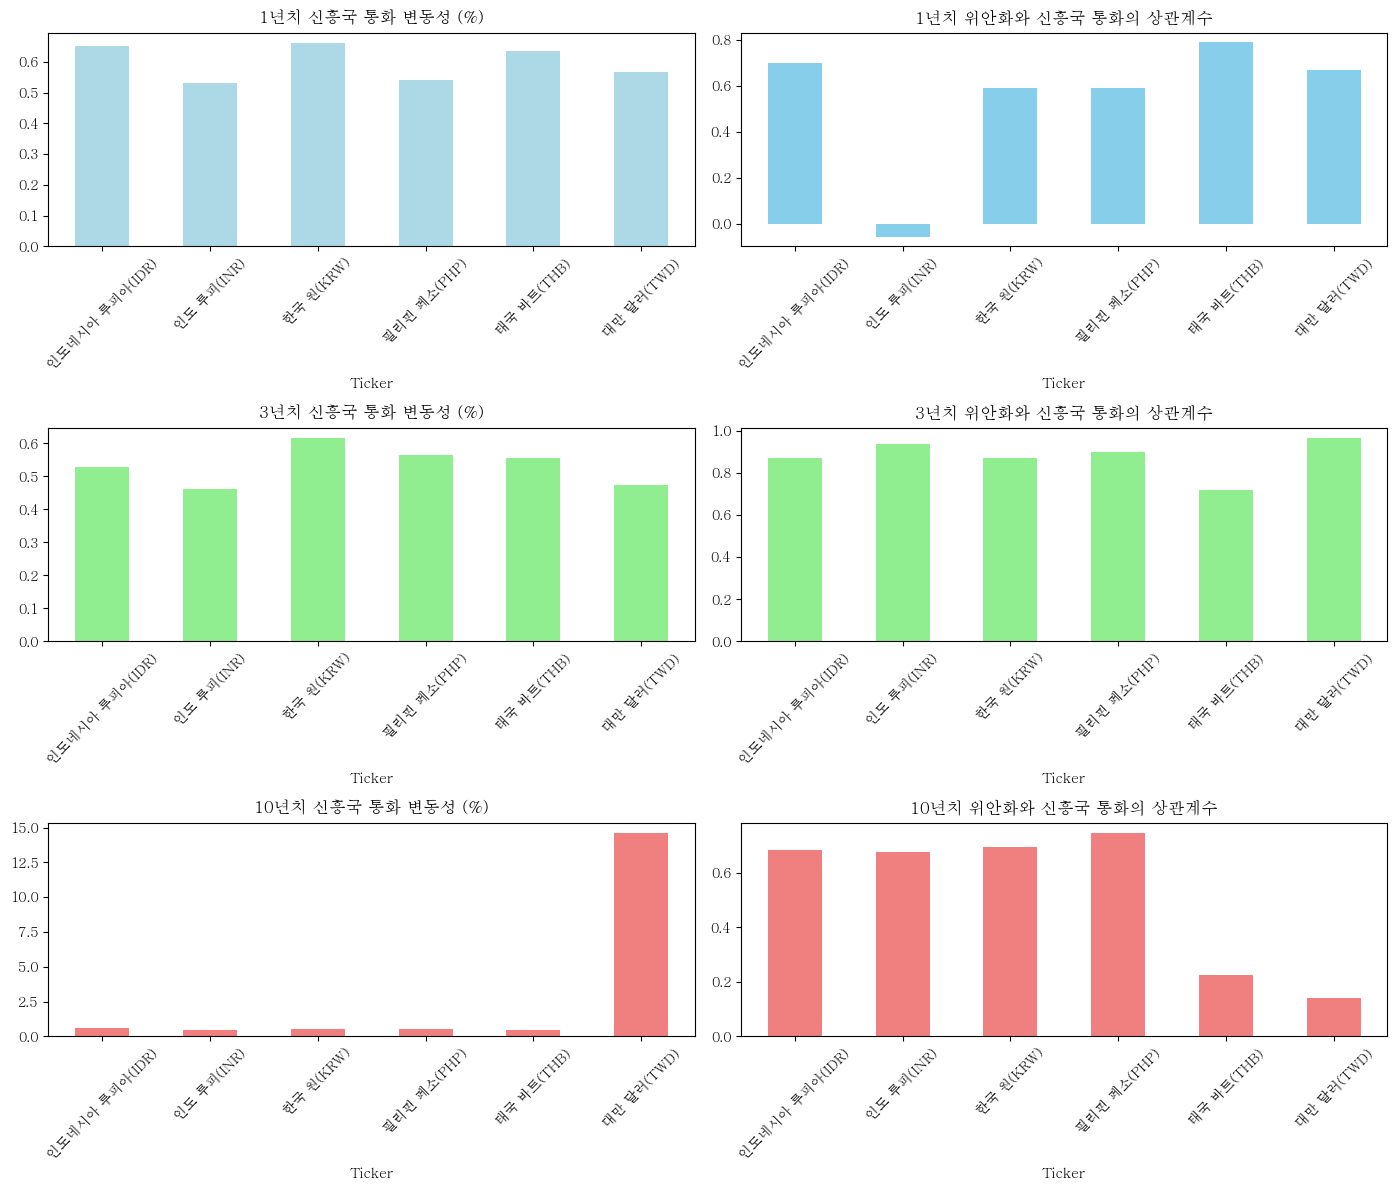

In [7]:
# 시각화 (변동성과 상관계수 비교)
plt.figure(figsize=(14, 12))
currency_names_emer = ['인도네시아 루피아(IDR)', '인도 루피(INR)', '한국 원(KRW)', '필리핀 페소(PHP)', '태국 바트(THB)', '대만 달러(TWD)']

# 1년치 변동성 그래프
plt.subplot(3, 2, 1)
volatility_1y_emer.plot(kind='bar', color='lightblue')
plt.title('1년치 신흥국 통화 변동성 (%)')
plt.xticks(ticks=range(len(currency_names_emer)), labels=currency_names_emer, rotation=45)  # x축 레이블 설정

# 3년치 변동성 그래프
plt.subplot(3, 2, 3)
volatility_3y_emer.plot(kind='bar', color='lightgreen')
plt.title('3년치 신흥국 통화 변동성 (%)')
plt.xticks(ticks=range(len(currency_names_emer)), labels=currency_names_emer, rotation=45)  # x축 레이블 설정

# 10년치 변동성 그래프
plt.subplot(3, 2, 5)
volatility_10y_emer.plot(kind='bar', color='lightcoral')
plt.title('10년치 신흥국 통화 변동성 (%)')
plt.xticks(ticks=range(len(currency_names_emer)), labels=currency_names_emer, rotation=45)  # x축 레이블 설정

# 1년치 상관계수 그래프
plt.subplot(3, 2, 2)
cny_correlation_1y_emer.plot(kind='bar', color='skyblue')
plt.title('1년치 위안화와 신흥국 통화의 상관계수')
plt.xticks(ticks=range(len(currency_names_emer)), labels=currency_names_emer, rotation=45)  # x축 레이블 설정

# 3년치 상관계수 그래프
plt.subplot(3, 2, 4)
cny_correlation_3y_emer.plot(kind='bar', color='lightgreen')
plt.title('3년치 위안화와 신흥국 통화의 상관계수')
plt.xticks(ticks=range(len(currency_names_emer)), labels=currency_names_emer, rotation=45)  # x축 레이블 설정

# 10년치 상관계수 그래프
plt.subplot(3, 2, 6)
cny_correlation_10y_emer.plot(kind='bar', color='lightcoral')
plt.title('10년치 위안화와 신흥국 통화의 상관계수')
plt.xticks(ticks=range(len(currency_names_emer)), labels=currency_names_emer, rotation=45)  # x축 레이블 설정

plt.tight_layout()
plt.show()